In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("intermediary_files/mds_coords_all_chr.csv")
df["pos"]=df.index
df["chromosome"]=df.chrom

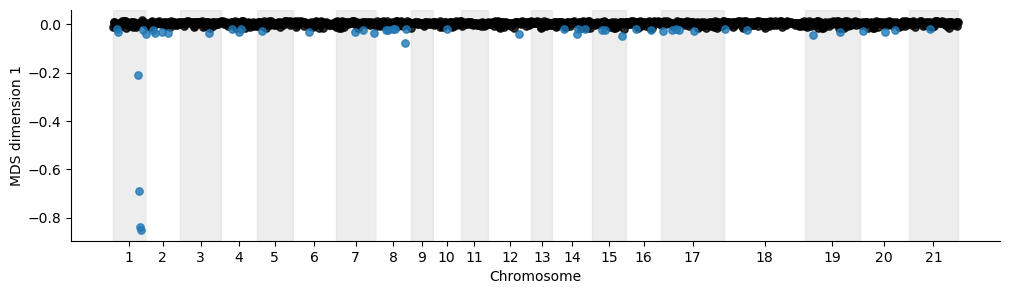

In [5]:
# MDS dimension 1

# Make sure data is sorted
df = df.sort_values(['chromosome', 'window'])
df['x'] = range(len(df))

# Identify chromosome boundaries
df['chromosome_shifted'] = df['chromosome'].shift()
chrom_change_idx = df[df['chromosome'] != df['chromosome_shifted']].index.tolist()
chrom_change_idx.append(len(df))  # add final boundary

# Compute 5th percentile
threshold = df['MDS1'].quantile(0.05)
low_mask = df['MDS1'] <= threshold
high_mask = ~low_mask

# Plotting
fig, ax = plt.subplots(figsize=(12, 3))

chrom_labels = []
chrom_centers = []
for i in range(len(chrom_change_idx)-1):
    start = df.loc[chrom_change_idx[i], 'x']
    end = df.loc[chrom_change_idx[i+1]-1, 'x']
    ax.axvspan(start, end, color='lightgrey' if i % 2 == 0 else 'white', zorder=0, alpha=0.4)

    center = (start + end) / 2
    chrom_centers.append(center)
    chrom_labels.append(str(i + 1))  # label as "1" to "21"

ax.scatter(df.loc[high_mask, 'x'], df.loc[high_mask, 'MDS1'], s=28, alpha=0.8, zorder=2, color='black')
ax.scatter(df.loc[low_mask, 'x'], df.loc[low_mask, 'MDS1'], s=28, alpha=0.8, zorder=2, color='C0')

ax.set_xticks(chrom_centers)
ax.set_xticklabels(chrom_labels)
ax.set_xlabel("Chromosome")
ax.set_ylabel("MDS dimension 1", labelpad=0)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.show()
plt.savefig(f"intermediary_files/global_local_mds1.pdf", format='pdf', bbox_inches='tight')

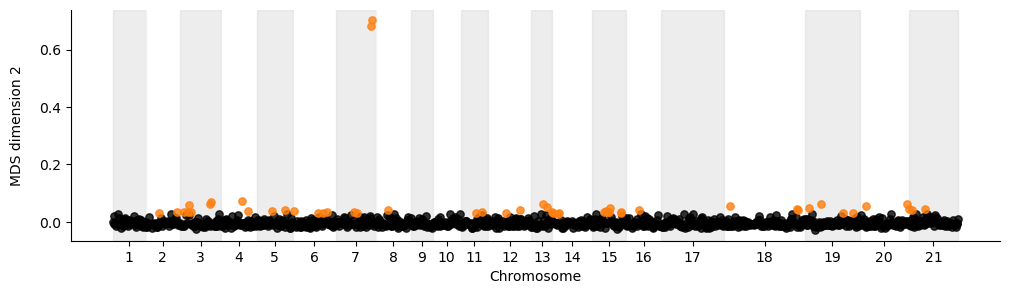

In [6]:
# MDS dimension 2

# Compute 5th percentile
threshold = df['MDS2'].quantile(0.95)
low_mask = df['MDS2'] >= threshold
high_mask = ~low_mask

# Plotting
fig, ax = plt.subplots(figsize=(12, 3))

chrom_labels = []
chrom_centers = []
for i in range(len(chrom_change_idx)-1):
    start = df.loc[chrom_change_idx[i], 'x']
    end = df.loc[chrom_change_idx[i+1]-1, 'x']
    ax.axvspan(start, end, color='lightgrey' if i % 2 == 0 else 'white', zorder=0, alpha=0.4)

    center = (start + end) / 2
    chrom_centers.append(center)
    chrom_labels.append(str(i + 1))  # label as "1" to "21"


ax.scatter(df.loc[high_mask, 'x'], df.loc[high_mask, 'MDS2'], s=28, alpha=0.8, zorder=2, color='black')
ax.scatter(df.loc[low_mask, 'x'], df.loc[low_mask, 'MDS2'], s=28, alpha=0.8, zorder=2, color='C1')

ax.set_xticks(chrom_centers)
ax.set_xticklabels(chrom_labels)
ax.set_xlabel("Chromosome")
ax.set_ylabel("MDS dimension 2", labelpad=0)
ax.yaxis.set_label_coords(-0.05, 0.5)  # (x, y): tweak -0.05 to move closer/further from the axis

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.show()
plt.savefig(f"intermediary_files/global_local_mds2.pdf", format='pdf', bbox_inches='tight')